---
title: Imbalanced Datasets
keywords: [imbalanced datasets, how to handle dataset imbalance, data analysis, data science, data wrangling]
description:  Let’s go through a simple example using the popular Iris dataset, which we’ll artificially imbalance for demonstration purposes
date: "2024-02"
author: Juma Shafara
---

![Photo by DATAIDEA](../../assets/banner4.png)

## Handling Imbalanced Dataset

Handling imbalanced datasets is a common challenge in machine learning, especially in classification tasks where one class significantly outnumbers the other(s). Let's go through a simple example using the popular Iris dataset, which we'll artificially imbalance for demonstration purposes. 

The Iris dataset consists of 150 samples, each belonging to one of three classes: Iris Setosa, Iris Versicolour, and Iris Virginica. We'll create an imbalanced version of this dataset where one class is underrepresented.

First, let's load the dataset and create the imbalance: 

In [ ]:
# !pip install imbalanced-learn
# !pip install --upgrade dataidea

In [ ]:
from dataidea.packages import pd, plt, np
from sklearn.datasets import load_iris

In [ ]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for manipulation
df = pd.DataFrame(data=np.c_[X, y], 
                  columns=iris.feature_names + ['target'])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<!-- Newsletter -->
<div style="background-color: #3a6e68; border:1px solid #3a6e68; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>Don't Miss Any Updates!</strong></div>
<div style="background-color: #f3f4f7; padding-left: 10px; padding-top: 10px; padding-bottom: 10px; padding-right: 10px">

<p class=pb-1>
Before we continue, we have a humble request, to be among the first to hear about future updates, simply enter your email below, follow us on <a href="https://x.com/dataideaorg"><i class="bi bi-twitter-x"></i>
 (formally Twitter)</a>, or subscribe to our <a href="https://www.youtube.com/@dataideaorg"><i class="bi bi-youtube"></i> YouTube channel</a>.
</p>

<iframe src="https://embeds.beehiiv.com/5fc7c425-9c7e-4e08-a514-ad6c22beee74?slim=true" data-test-id="beehiiv-embed" height="52" frameborder="0" scrolling="no" style="margin: 0; border-radius: 0px !important; background-color: transparent; width: 100%;" ></iframe>
</div>


### Introducing Imbalance

In [ ]:
# Introduce imbalance by removing samples from one class
class_to_remove = 2  # Iris Virginica
imbalance_ratio = 0.5  # Ratio of samples to be removed
indices_to_remove = np.random.choice(df[df['target'] == class_to_remove].index,
                                     size=int(imbalance_ratio * len(df[df['target'] == class_to_remove])),
                                     replace=False)
df_imbalanced = df.drop(indices_to_remove)

# Check the class distribution
value_counts = df_imbalanced['target'].value_counts()
print(value_counts)

target
0.0    50
1.0    50
2.0    25
Name: count, dtype: int64


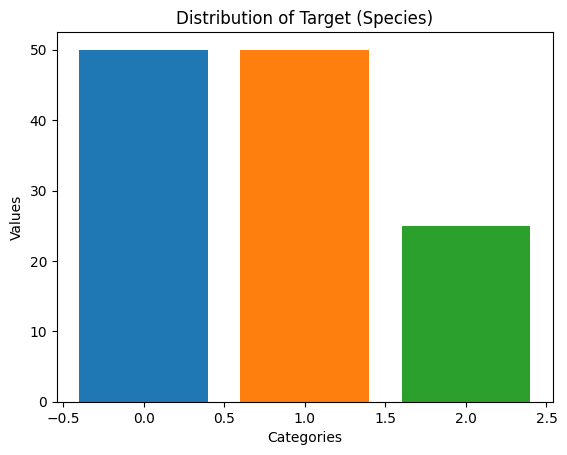

In [ ]:
plt.bar(value_counts.index, 
        value_counts.values, 
        color=["#1f77b4", "#ff7f0e", "#2ca02c"])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Distribution of Target (Species)')

plt.show()

Now, `df_imbalanced` contains the imbalanced dataset. Next, we'll demonstrate a few techniques to handle this imbalance:

1. **Resampling Methods:**
   - **Oversampling:** Randomly duplicate samples from the minority class.
   - **Undersampling:** Randomly remove samples from the majority class.
2. **Synthetic Sampling Methods:**
   - **SMOTE (Synthetic Minority Over-sampling Technique):** Generates synthetic samples for the minority class.
3. **Algorithmic Techniques:**
   - **Algorithm Tuning:** Adjusting class weights in the algorithm.
   - **Ensemble Methods:** Using ensemble techniques like bagging or boosting.

## Resampling 
### Oversampling
Let's implement oversampling using the `imbalanced-learn` library:

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Separate features and target
X_imbalanced = df_imbalanced.drop('target', axis=1)
y_imbalanced = df_imbalanced['target']

# Apply Random Over-Sampling
oversample = RandomOverSampler(sampling_strategy='auto', 
                               random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X_imbalanced, y_imbalanced)

# Check the class distribution after oversampling
oversampled_data_value_counts = pd.Series(y_resampled).value_counts()
print(oversampled_data_value_counts)

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64


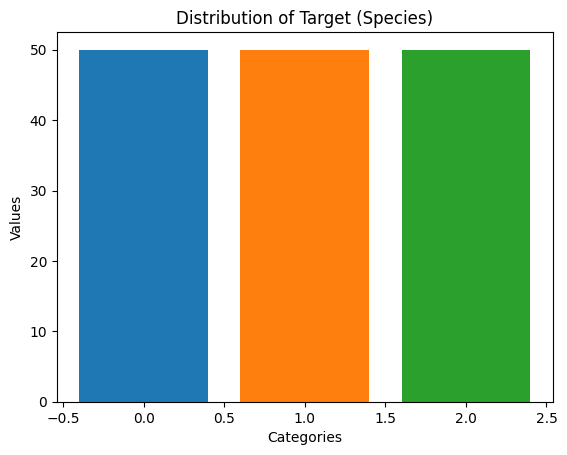

In [ ]:
plt.bar(oversampled_data_value_counts.index, 
        oversampled_data_value_counts.values, 
        color=["#1f77b4", "#ff7f0e", "#2ca02c"])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Distribution of Target (Species)')

plt.show()

### Undersampling:
Undersampling involves reducing the number of samples in the majority class to balance the dataset. Here's how you can apply random undersampling using the `imbalanced-learn` library:

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under-Sampling
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_imbalanced, y_imbalanced)

# Check the class distribution after undersampling
undersampled_data_value_counts = pd.Series(y_resampled).value_counts()
print(undersampled_data_value_counts)

target
0.0    25
1.0    25
2.0    25
Name: count, dtype: int64


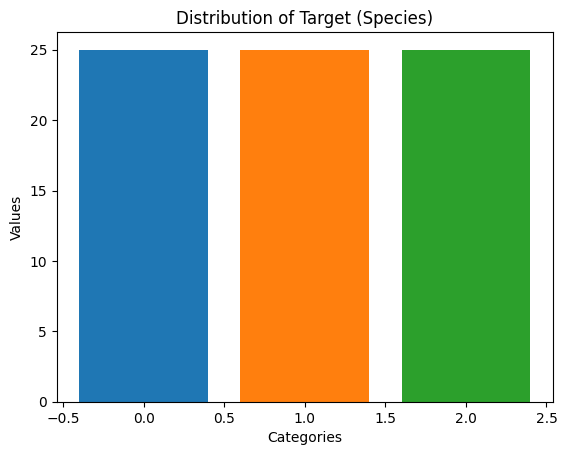

In [ ]:
plt.bar(undersampled_data_value_counts.index, 
        undersampled_data_value_counts.values, 
        color=["#1f77b4", "#ff7f0e", "#2ca02c"])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Distribution of Target (Species)')

plt.show()

## SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE generates synthetic samples for the minority class by interpolating between existing minority class samples.

Here's how you can apply SMOTE using the `imbalanced-learn` library:

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imbalanced, y_imbalanced)

# Check the class distribution after SMOTE
smoted_data_value_counts = pd.Series(y_resampled).value_counts()
print(smoted_data_value_counts)

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64


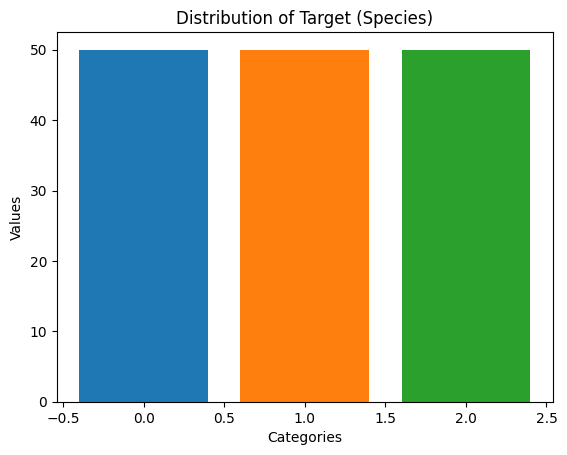

In [ ]:
plt.bar(smoted_data_value_counts.index, 
        smoted_data_value_counts.values, 
        color=["#1f77b4", "#ff7f0e", "#2ca02c"])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Distribution of Target (Species)')

plt.show()

By using SMOTE, you can generate synthetic samples for the minority class, effectively increasing its representation in the dataset. This can help to mitigate the class imbalance issue and improve the performance of your machine learning model.

## Algorithmic Techniques

### Algorithm Tuning:
Many algorithms allow you to specify class weights to penalize misclassifications of the minority class more heavily. Here's an example using the `class_weight` parameter in a logistic regression classifier:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imbalanced, y_imbalanced, 
                                                    test_size=0.2, random_state=42)

# Define the logistic regression classifier with class weights
class_weights = {0: 1, 1: 1, 2: 20}  # Penalize the minority class more heavily
log_reg = LogisticRegression(class_weight=class_weights)

# Train the model
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = log_reg.predict(X_test)

# display classification report
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0.0,1.000000,1.000000,1.000000,13.00
1.0,1.000000,0.750000,0.857143,8.00
2.0,0.666667,1.000000,0.800000,4.00
accuracy,0.920000,0.920000,0.920000,0.92
macro avg,0.888889,0.916667,0.885714,25.00
weighted avg,0.946667,0.920000,0.922286,25.00


In this example, the class weight for the minority class is increased to penalize misclassifications more heavily.

### Ensemble Methods
Ensemble methods can also be effective for handling imbalanced datasets. Techniques such as bagging and boosting can improve the performance of classifiers, especially when dealing with imbalanced classes.

Here's an example of using ensemble methods like Random Forest, a popular bagging algorithm, with an imbalanced dataset:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the performance
print("Random Forest Classifier:")
pd.DataFrame(data=classification_report(y_test, y_pred_rf, output_dict=True)).transpose()

Random Forest Classifier:


,precision,recall,f1-score,support
0.0,1.000000,1.000000,1.000000,13.00
1.0,1.000000,0.875000,0.933333,8.00
2.0,0.800000,1.000000,0.888889,4.00
accuracy,0.960000,0.960000,0.960000,0.96
macro avg,0.933333,0.958333,0.940741,25.00
weighted avg,0.968000,0.960000,0.960889,25.00


Ensemble methods like Random Forest build multiple decision trees and combine their predictions to make a final prediction. This can often lead to better generalization and performance, even in the presence of imbalanced classes.

### AdaBoost Classifier
Another ensemble method that specifically addresses class imbalance is AdaBoost (Adaptive Boosting). AdaBoost focuses more on those training instances that were previously misclassified, thus giving higher weight to the minority class instances.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define and train AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada_classifier.predict(X_test)

# Evaluate the performance
print("AdaBoost Classifier:")
pd.DataFrame(data=classification_report(y_test, y_pred_ada, output_dict=True)).transpose()

AdaBoost Classifier:


/home/jumashafara/venvs/dataidea/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,precision,recall,f1-score,support
0.0,1.000000,1.000000,1.000000,13.00
1.0,1.000000,0.875000,0.933333,8.00
2.0,0.800000,1.000000,0.888889,4.00
accuracy,0.960000,0.960000,0.960000,0.96
macro avg,0.933333,0.958333,0.940741,25.00
weighted avg,0.968000,0.960000,0.960889,25.00


By utilizing ensemble methods like Random Forest and AdaBoost, you can often achieve better performance on imbalanced datasets compared to individual classifiers, as these methods inherently mitigate the effects of class imbalance through their construction.

These are just a few techniques for handling imbalanced datasets. It's crucial to experiment with different methods and evaluate their performance using appropriate evaluation metrics to find the best approach for your specific problem.

<h2>What's on your mind? Put it in the comments!</h2>
<script src="https://utteranc.es/client.js"
        repo="dataideaorg/dataidea-science"
        issue-term="pathname"
        theme="github-dark"
        crossorigin="anonymous"
        async>
</script>